# Fast Voxel Traversal Algorithm for Ray Tracing
Source: http://www.cse.yorku.ca/~amana/research/grid.pdf

In [83]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def solar_angles_to_vector(azimuth, altitude):
    """
    Convert solar azimuth and altitude angles to a 3D vector

    Args:
        azimuth (float): Solar azimuth angle in degrees
        altitude (float): Solar altitude angle in degrees

    Returns:
        vec (np.ndarray): Normalized 3D vector representing sun direction
    """
    # Convert to radians
    azimuth_rad = np.radians(azimuth)
    altitude_rad = np.radians(altitude)

    # Calculate 3D vector components
    x = np.cos(azimuth_rad) * np.cos(altitude_rad)
    y = np.sin(azimuth_rad) * np.cos(altitude_rad)
    z = -np.sin(altitude_rad)

    # Normalize to unit vector
    vec = np.array([x, y, z])
    vec /= np.linalg.norm(vec)

    return vec


vec = solar_angles_to_vector(135, 1)
print(vec)


[-0.70699909  0.70699909 -0.01745241]


In [85]:
# def voxel_traversal(ray_start: np.ndarray, ray_vec: np.ndarray, grid_element_size : np.ndarray, grid_max_boundary : np.ndarray):
#     current_voxel = np.floor(ray_start / grid_element_size).astype(int) # id of the first current voxel hit by the ray
#     visited_voxels = current_voxel.copy() # initiate visited voxels array
#     step = np.sign(ray_vec)
#     next_voxel_boundary = (current_voxel + step) * grid_element_size
#     tMax = (next_voxel_boundary - ray_start) / ray_vec
#     tDelta = grid_element_size / ray_vec * step

#     diff = np.zeros(3, dtype=int)
#     neg_ray = any(ray < 0 for ray in ray_vec)
#     diff -= np.less(ray_vec, 0).astype(int)
#     if neg_ray:
#         current_voxel += diff
#         visited_voxels = np.row_stack((visited_voxels, current_voxel))
#     i = 0
#     while (i < 10000):
#         if tMax[0] < tMax[1]:
#             if tMax[0] < tMax[2]:
#                 current_voxel[0] += step[0]
#                 if current_voxel[0] == grid_max_boundary[0] or current_voxel[0] == -1:
#                     return visited_voxels
#                 tMax[0] += tDelta[0]
#             else:
#                 current_voxel[2] += step[2]
#                 if current_voxel[2] == grid_max_boundary[2] or current_voxel[2] == -1:
#                     return visited_voxels
#                 tMax[2] += tDelta[2]
#         else:
#             if tMax[1] < tMax[2]:
#                 current_voxel[1] += step[1]
#                 if current_voxel[1] == grid_max_boundary[1] or current_voxel[1] == -1:
#                     return visited_voxels
#                 tMax[1] += tDelta[1]
#             else:
#                 current_voxel[2] += step[2]
#                 if current_voxel[2] == grid_max_boundary[2] or current_voxel[2] == -1:
#                     return visited_voxels
#                 tMax[2] += tDelta[2]
#         visited_voxels = np.row_stack((visited_voxels, current_voxel))
#         i += 1
#     return visited_voxels

# ray_start = np.array([0.5, 0.5, 0.5])
# grid_element_size = np.array([1, 1, 1])
# ray_vec = solar_angles_to_vector(45, 45)
# grid_max_boundary = np.array([10, 10, -10])
# # ray_vec = -np.array([0.5, -0.2, -0.4])
# ids = voxel_traversal(ray_start, ray_vec, grid_element_size, grid_max_boundary)
# print(len(ids))


In [86]:
def voxel_traversal(ray_start: np.ndarray, ray_vec: np.ndarray, grid_element_size: np.ndarray, terrain_array: np.ndarray, max_elevation=None):

    if max_elevation != None:  # optimize for elevation
        x0, y0, z0 = ray_start
        A, B, C = ray_vec
        t = (max_elevation - z0) / C
        x = x0 + A * t
        y = y0 + B * t
        ray_start = np.array([x, y, max_elevation])

        if current_voxel[0] >= grid_max_boundary[0] or current_voxel[0] <= 0:
            return visited_voxels
        if current_voxel[1] >= grid_max_boundary[1] or current_voxel[1] <= 0:
            return visited_voxels

    current_voxel = np.floor(ray_start / grid_element_size).astype(int)
    visited_voxels = np.reshape(current_voxel.copy(), (1, 3))
    grid_max_boundary = np.array(terrain_array.shape)

    step = np.sign(ray_vec)
    next_voxel_boundary = (current_voxel + step) * grid_element_size
    tMax = (next_voxel_boundary - ray_start) / ray_vec
    tDelta = grid_element_size / ray_vec * step

    diff = np.zeros(3, dtype=int)
    neg_ray = any(ray < 0 for ray in ray_vec)
    diff -= np.less(ray_vec, 0).astype(int)
    if neg_ray:
        current_voxel += diff
        visited_voxels = np.row_stack((visited_voxels, current_voxel))
    i = 0
    while (i < 10000):
        if tMax[0] < tMax[1]:
            if tMax[0] < tMax[2]:
                current_voxel[0] += step[0]
                if (current_voxel[0] == grid_max_boundary[0] or
                    current_voxel[0] == 0 or
                        terrain_array[current_voxel[0], current_voxel[1],  current_voxel[2]]):
                    return np.row_stack((visited_voxels, current_voxel))
                tMax[0] += tDelta[0]
            else:
                current_voxel[2] += step[2]
                if current_voxel[2] == grid_max_boundary[2] or current_voxel[2] == 0 or terrain_array[current_voxel[0], current_voxel[1], current_voxel[2]]:
                    return np.row_stack((visited_voxels, current_voxel))
                tMax[2] += tDelta[2]
        else:
            if tMax[1] < tMax[2]:
                current_voxel[1] += step[1]
                if current_voxel[1] == grid_max_boundary[1] or current_voxel[1] == 0 or terrain_array[current_voxel[0], current_voxel[1],  current_voxel[2]]:
                    return np.row_stack((visited_voxels, current_voxel))
                tMax[1] += tDelta[1]
            else:
                current_voxel[2] += step[2]
                if current_voxel[2] == grid_max_boundary[2] or current_voxel[2] == 0 or terrain_array[current_voxel[0], current_voxel[1],  current_voxel[2]]:
                    return np.row_stack((visited_voxels, current_voxel))
                tMax[2] += tDelta[2]
        visited_voxels = np.row_stack((visited_voxels, current_voxel))
        i += 1
    return visited_voxels


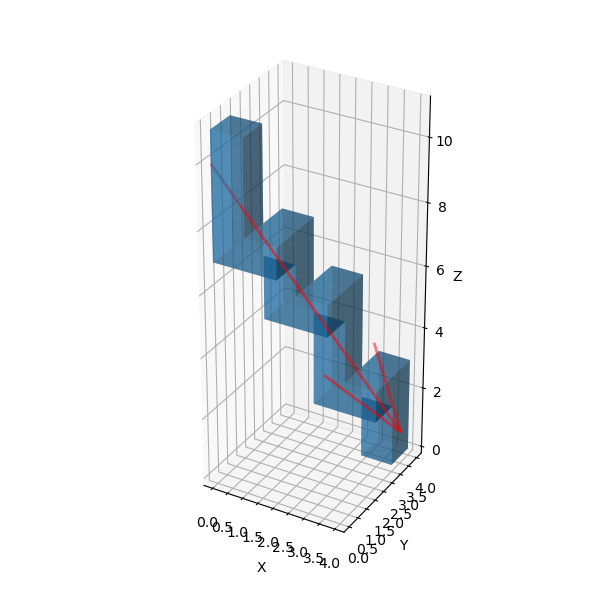

In [87]:
grid_element_size = np.array([1, 1, 1])
ray_start = np.array([0, 0, 10])
ray_vec = solar_angles_to_vector(45, 60)
# no terrain collision
terrain_array = np.full((10, 10, 10), False, dtype=bool)
ids = voxel_traversal(ray_start, ray_vec, grid_element_size, terrain_array)

x_min = np.min(ids[:, 0])
y_min = np.min(ids[:, 1])
z_min = np.min(ids[:, 2])

x_max = np.max(ids[:, 0]) + 1
y_max = np.max(ids[:, 1]) + 1
z_max = np.max(ids[:, 2]) + 1

x_range = np.arange(x_min, x_max + 1, 1)
y_range = np.arange(y_min, y_max + 1, 1)
z_range = np.arange(z_min, z_max + 1, 1)

l = np.sqrt(np.sum(((np.max(ids, axis=0)-np.min(ids, axis=0)) *
            grid_element_size)**2))  # ray length (only for visuals)

x, y, z = np.meshgrid(x_range, y_range, z_range,
                      indexing="ij")  # define voxel grid

voxel_array = np.zeros((len(x_range), len(y_range), len(z_range)), dtype=bool)

voxel_array[ids[:, 0]-x_min, ids[:, 1]-y_min, ids[:, 2]-z_min] = True

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6, 6))
ax.voxels(x, y, z, voxel_array[0:-1, 0:-1, 0:-1], linewidth=0.5, alpha=0.5)

ax.quiver(*(ray_start/grid_element_size), *(ray_vec/grid_element_size)
          * l, color="red", linewidth=2, alpha=0.5)
ax.set(aspect="equal")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [88]:
import numpy as np

i, j, k = np.array([10, 10, 10])*100  # Replace with your desired dimensions

total_elements = i * j * k
half_elements = total_elements // 2

# Create an array of the desired shape with all False values
terrain_array = np.full((i, j, k), False, dtype=bool)

# Set the bottom half along the z-axis to True
terrain_array[:, :, :half_elements // (i * j)] = True

ray_start = np.array([8, 8, 8])*100
grid_element_size = np.array([1, 1, 1])
ray_vec = solar_angles_to_vector(45, 60)

# grid_max_boundary = np.array(terrain_array.shape)

ids = voxel_traversal(ray_start, ray_vec, grid_element_size, terrain_array)
print((ids))


[[800 800 800]
 [800 800 799]
 [800 800 798]
 ...
 [922 922 501]
 [922 922 500]
 [922 922 499]]
